<center>
    <img src="../imagens/logo_APL.png" width="300" alt="APL logo"  />
</center>

# Algoritmo: K vizinhos mais próximos - KNN 

**Bem vindo!** Neste notebook será abordada o algoritmo K vizinhos mais próximos (KNN). Usaremos a biblioteca  `Scikit-Learn`, desenvolvida especificamente para aplicação prática de algoritmos de *machine learning*. Ao final, espera-se que você seja capaz de entender e aplicar esse algoritmo<h2>Conteúdo:</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li> Introdução </li>
    <li> Entendendo e Carregando o Dataset </li> 
    <li> Análise Exploratória dos Dados: </li>
        <ul>
            <li> Visualização dos dados </li> 
            <li> Normalização dos dados: features vs target </li>     
            <li> Dividir o Dataset: Treinamento e Validação </li>   
            <li> Algoritmo de Machine Learning </li>  
            <li> Predições </li>  
            <li> Avaliação </li>  
        </ul>
</ul>
</div>

<hr> para análise preditiva de dados.

Neste notebook, você carregará um conjunto de dados do cliente, ajustará os dados e usará K vizinhos mais próximos para prever um ponto de dados. Mas o que são ** K vizinhos mais próximos**?

** K vizinhos mais próximos** ou **KNN** é um algoritmo para aprendizado supervisionado. Onde os dados são 'treinados' com pontos de dados correspondentes à sua classificação. Uma vez que um ponto deve ser previsto, ele leva em consideração os 'K' pontos mais próximos a ele para determinar sua classificação.

#### A figura abaixo mostra um exemplo do conceito de KNN.
<center>
<img src="../imagens/KNN Diagram.png"  width="500">
</center>

Nesse caso, temos pontos de dados de Classe A e B. Queremos prever o que é a estrela (ponto de dados de teste). Se considerarmos um valor k de 3 (3 pontos de dados mais próximos), obteremos uma previsão da Classe B. No entanto, se considerarmos um valor k de 6, obteremos uma previsão da Classe A.

Nesse sentido, é importante considerar o valor de k. Mas, com sorte, a partir deste diagrama, você deve ter uma ideia do que é o algoritmo KNN. Ele considera os 'K' Vizinhos Mais Próximos (pontos) quando prevê a classificação do ponto de teste.

Carregando as bibliotecas

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Entendendo e Carregando o Dataset

Imagine que um provedor de telecomunicações tenha segmentado sua base de clientes por padrões de uso de serviço, categorizando os clientes em quatro grupos. Se os dados demográficos puderem ser usados para prever a associação ao grupo, a empresa pode customizar ofertas para clientes em potencial individuais. É um problema de classificação. Ou seja, dado o conjunto de dados, com rótulos predefinidos, precisamos construir um modelo a ser usado para prever a classe de um caso novo ou desconhecido.

O exemplo se concentra no uso de dados demográficos, como região, idade e estado civil, para prever os padrões de uso.

O campo de destino, denominado ** custcat**, tem quatro valores possíveis que correspondem aos quatro grupos de clientes, da seguinte forma:
- Basic Service
- E-Service
- Plus Service
- Total Service

Nosso objetivo é construir um classificador, para prever a classe de casos desconhecidos. Usaremos um tipo de classificação KNN.

Agora vamos carregar os dados do arquivo CSV:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/APL-Data-Intelligence/AcelerAI/main/Curso_NEED/datasets/telecust_dataset/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
# Análise Exploratória dos Dados

### Visualização dos dados

#### Vamos ver quantos elementos de cada classe está em nosso conjunto de dados


In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Você pode explorar facilmente seus dados usando técnicas de visualização:


Text(0, 0.5, 'Quantidade')

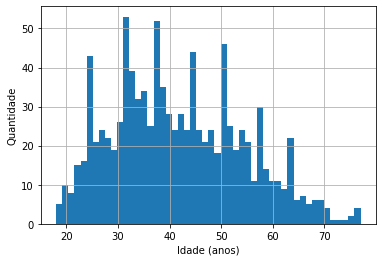

In [47]:
df.hist(column='age', bins=50)
plt.title('')
plt.xlabel('Idade (anos)')
plt.ylabel('Quantidade')

### Separar as Colunas do Dataframe: Regressores vs Alvo

Vamos definir o conjunto de características, X:


In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Vamos criar um novo dataframe a partir do dataframe orignal, utilizando-se as **features** (ou os regressores) desejadas:

In [48]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)

Agora vamos criar o nosso dataframe que corresponde a variável **alvo**, ou seja, a variável que queremos fazer a predição.

In [51]:
y = df['custcat'].values

### Normalização dos dados

O algoritmo KNN é baseado na distância entre amostras. A padronização dessa variável, em dados com média zero e variância unitária é, portanto, uma boa prática. Para tanto, vamos usar o método `preprocessing.StandardScaler()`:

In [52]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

### Dividir o Dataset: Treinamento e Validação

Vamos dividir nosso dataset em duas partes: 1) dados de treinamento; e 2) dados de validação.  Para tanto, vamos utilizar o método `train_test_split`.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Conjunto de treinamento:', X_train.shape,  y_train.shape)
print ('Conjunto de teste:', X_test.shape,  y_test.shape)

Conjunto de treinamento: (800, 11) (800,)
Conjunto de teste: (200, 11) (200,)


## Algoritmo de Machine Learning: `KNN` 


**Passo 1:** Importando a componente do classificador na biblioteca `sklearn.neighbors`:

In [12]:
from sklearn.neighbors import KNeighborsClassifier

**Passo 2**: Instanciando o Estimador. 

In [31]:
# Vamos começar o algoritmo com k=3.
k = 3
# Treine o modelo com o conjunto de treinamento
neigh = KNeighborsClassifier(n_neighbors = k)

**Passo 3**: Ajustar os parâmetros do modelo a partir dos dados

- Treinamento do modelo;
- Modelo está tentando aprender a relação de mapeamento entre a entrada X e a saída y.

In [32]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

**Passo 4:** Fazer a predição a partir de uma nova amostra:

- Novas amostras (dados que não foram usados no treinamento) são chamados *"out-of-sample" data*;
- O algoritmo vai usar as relações que foram aprendidas durante o processo de treinamento do modelo;
- Vamos usar o conjunto de **teste** na predição

In [33]:
y_pred = neigh.predict(X_test)

### Avaliação

Vamos mostrar alguns valores reais e comparar com algumas predições feitas pelo nosso modelo:

In [34]:
print("Valores reais: ", y_test[0:5])
print("Valores que foram previstos pelo modelo: ", y_pred[0:5])

Valores reais:  [4 1 1 2 4]
Valores que foram previstos pelo modelo:  [1 3 1 4 4]


Comparando os arrays anteriores podemos observar que nosso modelo acertou algumas previões enquanto errou outras.

Na classificação **multi-classes**, o método `metrics.accuracy_score` calcula a acurácia do modelo, ou seja, o percentual de valores previstos que foram iguais aos valores reais.

In [35]:
from sklearn import metrics
print("Precisão no conjunto de treino: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Precisão no conjunto de teste: ", metrics.accuracy_score(y_test, y_pred))

Precisão no conjunto de treino:  0.56875
Precisão no conjunto de teste:  0.315


## E quanto a outros valores para o parâmetro`K`?

K em KNN é o número de vizinhos mais próximos a serem examinados. Deve ser especificado pelo usuário. Então, como podemos escolher o valor certo para K?
A solução geral é reservar uma parte de seus dados para testar a precisão do modelo. Em seguida, escolha k = 1, use a parte de treinamento para modelagem e calcule a precisão da previsão usando todas as amostras em seu conjunto de teste. Repita esse processo, aumentando k, e veja qual k é o melhor para o seu modelo.

Podemos calcular a precisão de KNN para diferentes Ks.

In [25]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # Treina o modelo e faz a predição
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### Plotar valor de precisão por K


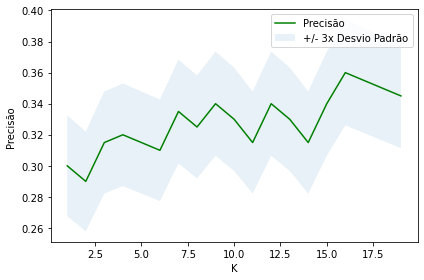

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Precisão ', '+/- 3x Desvio Padrão'))
plt.ylabel('Precisão ')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [39]:
print( "A melhor precisão foi de ", 100*mean_acc.max(), "%, com k =", mean_acc.argmax()+1, '.')

A melhor precisão foi de  34.0 %, com k = 9 .


<hr>

## Direitos Autorais

[APL Data Intelligence](https://linktr.ee/APLdataintelligence)&#8482;  2021. Este notebook Python e seu código fonte estão liberados sob os termos da [Licença do MIT](https://bigdatauniversity.com/mit-license/).